<a href="https://colab.research.google.com/github/seunghee0518/python_colab/blob/main/tensorflow_CNN(ConvNet)%5Bdata_fashion_mnist%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN : fashion_mnist dataset

In [ ]:
#import library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#fashion_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


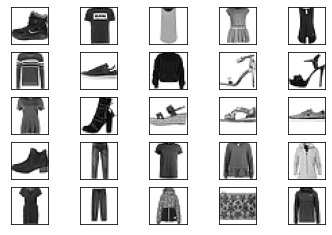

In [ ]:
#define class
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#visualize image only 25
for i in range(25) : 
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

## DNN model [Do not apply ConvNet]

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #Required process 
model_DNN = tf.keras.models.Sequential([
                                         tf.keras.layers.Flatten(input_shape = (28, 28)), # change 2d to 1d  
                                         tf.keras.layers.Dense(128, activation= 'relu'), # lnstead of conv layer, dense layer makes propery map/ Dimension reduction
                                         tf.keras.layers.Dropout(0.2), # prevent overfit(input data' 20%[random] -> 0)
                                         tf.keras.layers.Dense(10, activation = 'softmax')]) # out layer = 10

model_DNN.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_DNN.fit(x_train, y_train, epochs = 5)
model_DNN.evaluate(x_test, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5313 - accuracy: 0.8124
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4021 - accuracy: 0.8544
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3682 - accuracy: 0.8658
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3483 - accuracy: 0.8738
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.8773
313/313 - 0s - loss: 0.3512 - accuracy: 0.8720


[0.35118189454078674, 0.871999979019165]

* DNN에서는 이미지의 공간적 특성들이 무시됨
* CNN에서는 밀집층 직전의 입력과 그 후의 출력만 완전연결층으로 만들어 이미지의 공간 정보 유지함

## CNN model

In [ ]:
#preprocess : Pixels : 0~255 -> 0 ~ 1
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) // 255.

In [ ]:
#CNN model
model_CNN = tf.keras.Sequential([
                                 tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
                                 tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                                 tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                                 tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128, activation = 'relu'),
                                 tf.keras.layers.Dense(10, activation = 'softmax')])

model_CNN.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

* Conv와 MaxPolling의 쌍으로 구성됨

In [ ]:
#training model & evaluation
model_CNN.fit(X_train_final, y_train, epochs = 5)
model_CNN.evaluate(X_test_final, y_test, verbose = 2) 

Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.8470 - accuracy: 0.6850
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5743 - accuracy: 0.7888
Epoch 3/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5111 - accuracy: 0.8142
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4690 - accuracy: 0.8311
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4312 - accuracy: 0.8448
313/313 - 3s - loss: 3.1588 - accuracy: 0.1000


[3.158832311630249, 0.10000000149011612]

# explainable CNN : feature map visualization


In [ ]:
#library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# model - use to Sequential API
model_eCNN = tf.keras.models.Sequential([
                                         tf.keras.layers.Conv2D(input_shape = (100, 100, 3), activation = 'relu', kernel_size = (5, 5), filters = 32),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Conv2D(activation = 'relu', kernel_size = (5, 5), filters = 64),
                                         tf.keras.layers.MaxPooling2D(),
                                         tf.keras.layers.Flatten(),
                                         tf.keras.layers.Dense(128, activation = 'relu'),
                                         tf.keras.layers.Dense(64, activation = 'relu'),
                                         tf.keras.layers.Dense(32, activation = 'relu'),
                                         tf.keras.layers.Dense(2, activation = 'softmax')
])

model_eCNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)         

In [ ]:
# feature map definition
ins = model_eCNN.inputs # (None, 100, 100, 3)
outs = model_eCNN.layers[0].output # first layer output (None, 96, 96, 32)
feature_map = Model(inputs = ins, outputs = outs)
feature_map.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


TypeError: ignored

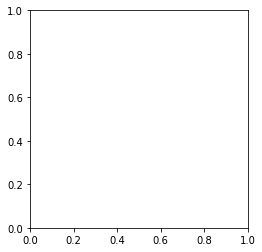

In [ ]:
#read image
img_url = "https://raw.githubusercontent.com/gilbutITbook/080263/master/chap5/data/cat.jpg"
img = cv2.imread(img_url)
plt.imshow(img)

In [ ]:
# preprocess image & check feature map(first dense? / Layer close to the imput layer)
img = cv2.resize(img, (100, 100)) #resize image size
input_img = np.expand_dims(img, axis = 0) #adjust image dimension
print(input_img.shape)

feature = feature_map.predict(input_img) #apply image to model
print(feature.shape)

fig = plt.figure(figsize = (50, 50))
for i in range(16) : #print 16images
  ax = fig.add_subplot(8, 4, i+1) #subplot(m, n, p)
  ax.imshow(feature[0, :, :, i])

In [ ]:
#apply image to model & second layer
ins_2 = ins
out_2 = model_eCNN.layers[2].output #shape : (None,1000)
feature_map2 = Model(inputs = ins_2, outputs = outs_2)

feature_2 = feature_map2.predict(input_img)
for i in range(48) :
  ax = fig.add_subplot(8, 8, i+1)
  ax.imshow(feature_2[0,:,:,i])


In [ ]:
#apply image to model & six layer
ins_6 = ins
outs_6 = model_eCNN.layers[6].output
feature_map6 = Model(inputs = ins_6, outputs = outs)

feature_6 = feature_map6.predict(input_img)
for i in range(48):
  ax = fig.add_subplot(8, 8, i+1)
  ax.imshow(feature_6[0, :, :, i])